# Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import src.edhec_risk_kit as erk
import portfolio_design.src.analysis as an

from scipy import stats
from src import data


ix = pd.IndexSlice

%matplotlib inline

In [72]:
df = (
  pd
    .read_csv('/Users/calvindelima/Downloads/Renpho-Calvin 2.csv')
    .assign(
      date = lambda df: pd.to_datetime(df['Time of Measurement']),
      weight = lambda df: df['Weight(lb)'],
      muscle_mass = lambda df: df['Muscle Mass(lb)'],
      body_fat = lambda df: df['Body Fat(%)']
    )
  [[
    'date',
    'weight',
    'muscle_mass',
    'body_fat'
  ]]
  .set_index('date')
)
df.tail()

,weight,muscle_mass,body_fat
date,,,
2020-10-21 06:32:37,156.0,125.6,15.3
2020-10-20 06:29:47,157.2,126.0,15.6
2020-10-18 14:57:39,160.8,127.6,16.4
2020-10-18 14:56:40,160.8,--,--
2020-10-18 14:55:10,161.2,--,--


In [73]:
daily_df = (
  df
    .replace('--', np.nan)
    .resample('1D')
    .first()
    .ffill()
    .astype(float)
)
daily_df.tail()

,weight,muscle_mass,body_fat
date,,,
2021-04-01,158.6,126.6,16.0
2021-04-02,158.6,126.6,16.0
2021-04-03,158.6,126.6,16.0
2021-04-04,158.6,126.6,16.0
2021-04-05,159.2,127.0,16.1


In [74]:
weekly_df = daily_df.resample('W-MON').mean()
monthly_df = daily_df.resample('MS').mean()

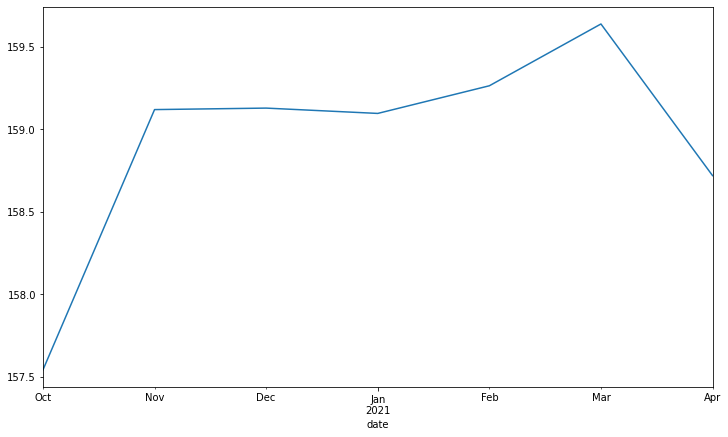

In [75]:
monthly_df['weight'].plot(figsize = (12, 7));

<AxesSubplot:xlabel='date'>

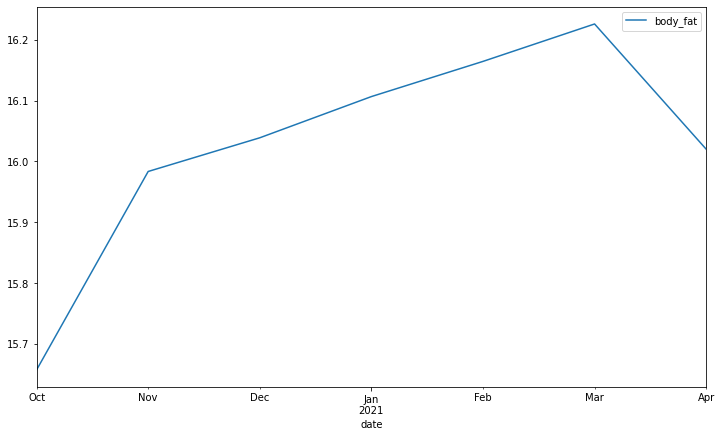

In [86]:
(
  monthly_df
    .assign(muscle_mass = lambda df: df['muscle_mass'] / df['weight'])
    [['body_fat']]
    .plot(figsize = (12, 7))
)

<AxesSubplot:xlabel='date'>

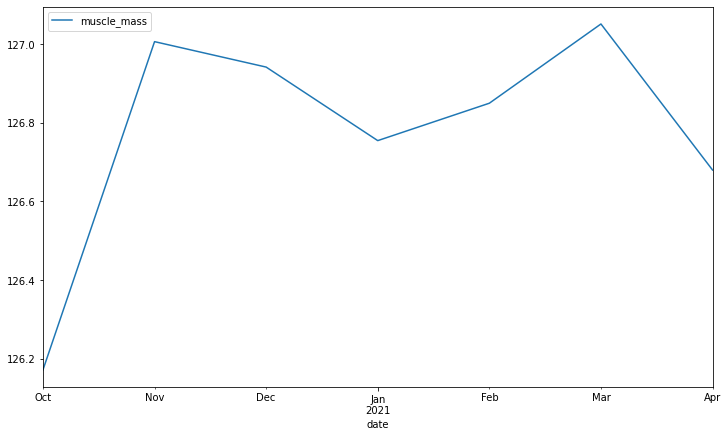

In [87]:
(
  monthly_df
    [['muscle_mass']]
    .plot(figsize = (12, 7))
)